In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical

# Hides the GPU from TensorFlow
tf.config.set_visible_devices([], 'GPU') 

## Notes for me

### Simple Linear Regression with Keras

In [3]:
n = 1000  # observations
b0 = 30   # intercept
b1 = 5    # slope

np.random.seed(123)

x = np.random.uniform(-1, 1, size=n).reshape(-1, 1) # Features in 2D array for sklearn
y = b0 + b1*x.squeeze() + np.random.normal(size=n)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 676.8830
Epoch 2/10
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 248.3154

/Users/paulkoslowsky/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 190.7096
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 52.6107
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 16.4119
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 5.5374
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6434
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 1.5941
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 1.3737
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 1.0939
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 1.0275


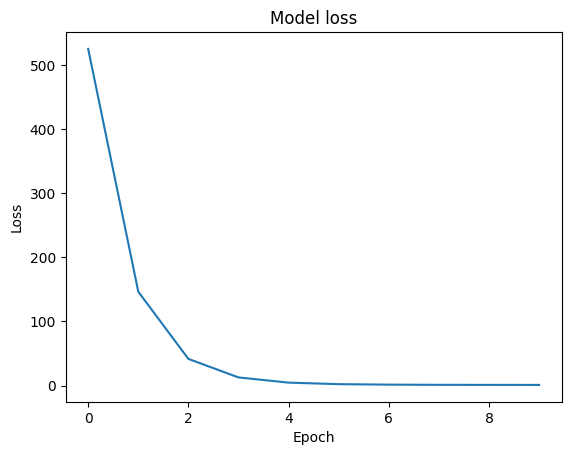

In [4]:
# Define model architecture
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,))
])

# Compile model
model.compile(optimizer='sgd', loss='mse')

# Fit model
history = model.fit(x, y, epochs=10)

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
model.get_weights()

[array([[4.2546544]], dtype=float32), array([29.932415], dtype=float32)]

### BINARY

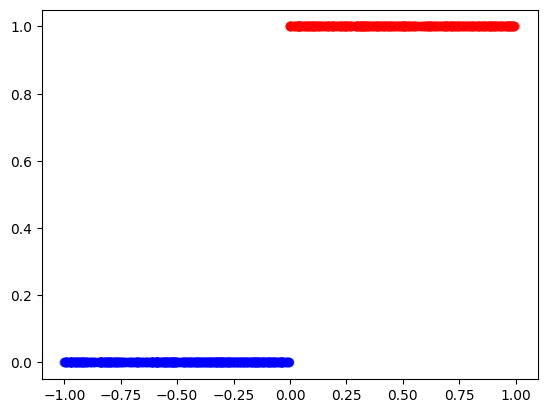

In [8]:
# Generate synthetic data for binary classification
np.random.seed(123)
x = np.random.uniform(-1, 1, size=n)
y = np.where(x > 0, 1, 0)

# Plot
plt.scatter(x, y, c=y, cmap='bwr', alpha=0.5)
plt.show()

Epoch 1/30


/Users/paulkoslowsky/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 3.7920e-04 - loss: 0.9129
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.0042 - loss: 0.8854
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.0026 - loss: 0.8518  
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.0064 - loss: 0.8317  
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.0061 - loss: 0.8005  
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.0159 - loss: 0.7793
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0240 - loss: 0.7562 
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.0644 - loss: 0.7330
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.1438 - loss: 0.7123
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.5307 - loss: 0.6925
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8314 - loss: 0.6740
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step -

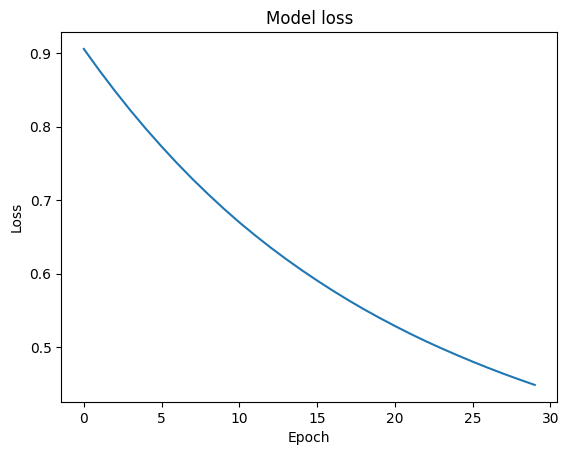

In [15]:
### Sigmoid Activation Function

#When predicting a binary response, we use a sigmoid activation function.
# Define model architecture
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,), activation='sigmoid')
])

# Compile model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(x, y, epochs=30, verbose=1)

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [11]:
model.get_weights()

[array([[3.9590526]], dtype=float32), array([-0.03301461], dtype=float32)]

| Parameter      | Increase Effect                                | Decrease Effect                             | Notes                            |
|----------------|------------------------------------------------|---------------------------------------------|----------------------------------|
| `learning_rate`| Faster training, can become unstable           | Slower but more stable                      | Try 0.01–0.1                     |
| `momentum`     | Smoother updates, faster convergence           | More fluctuation, less smoothing            | Try 0.9–0.99                     |
| `epochs`       | More learning, risk of overfitting             | May stop too early, underfitting            | Try 100–300                      |
| `batch_size`   | More stable updates, faster training per epoch | Noisier learning, possibly better generalization | Try powers of 2: 32–256         |
| `input_shape`  | — depends on number of input features          | — must match feature count in your data     | E.g. `(3,)` for 3 input features |
| `layers`       | More capacity to learn complex patterns        | Simpler model, may underfit                 | Start with 1–3 hidden layers     |


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8961 - accuracy: 0.7644 - loss: 0.9903 - val_AUC: 0.9937 - val_accuracy: 0.9350 - val_loss: 0.1684
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9945 - accuracy: 0.9367 - loss: 0.1564 - val_AUC: 0.9950 - val_accuracy: 0.9337 - val_loss: 0.1600
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.9957 - accuracy: 0.9419 - loss: 0.1433 - val_AUC: 0.9938 - val_accuracy: 0.9450 - val_loss: 0.1581
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9961 - accuracy: 0.9439 - loss: 0.1343 - val_AUC: 0.9953 - val_accuracy: 0.9362 - val_loss: 0.1543
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9958 - accuracy: 0.9369 - loss: 0.1451 - val_AUC: 0.9953 - val_accuracy: 0.9350 - val_loss: 0.1547
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9953 - accuracy: 0.9345 - loss: 0.1537 - val_AUC: 0.9946 - val_accuracy: 0.9413 - val_loss: 0.1543
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

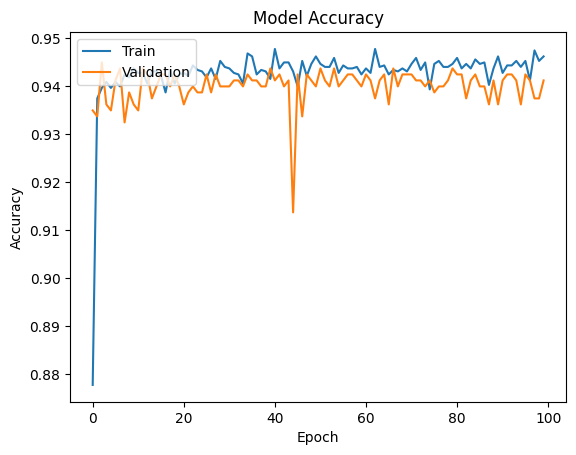

In [18]:
# Example:

# Set random seed for reproducibility
np.random.seed(123)

# Generate synthetic multi-class data
# 5000 samples, 4 classes, 3 input features
x, y = make_blobs(n_samples=5000, centers=4, n_features=3, cluster_std=3, random_state=42)
y_cat = to_categorical(y)  # Convert to one-hot encoded labels

# Train-test split: 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=42)

# === Define Model Architecture ===
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(3,)),     # 3 input features, 16 neurons (width)
    # keras.layers.Dense(16, activation='relu'),                     # Optional: add more layers for more depth
    keras.layers.Dense(y_cat.shape[1], activation='softmax')         # Output: 4 classes (softmax for multi-class)
])

# === Compile the Model ===
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),  # Tunable: learning rate, momentum
    loss='categorical_crossentropy',                                   # Suitable for multi-class classification
    metrics=['accuracy', 'AUC']                                        # Evaluate both accuracy and AUC
)

# === Train the Model ===
history = model.fit(
    x_train, y_train,
    epochs=100,                   # Can tune: try 100–300
    batch_size=64,                # Can tune: try powers of 2 like 32, 64, 128
    validation_split=0.2,         # 20% of training used for validation
    verbose=1
)

# === Plot Training & Validation Accuracy ===
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Model Accuracy Graph Interpretation

- **Blue Line (Train Accuracy)**
  - Shows how well the model is performing on training data over 100 epochs
  - Remains consistently high (around 94–95%)
  - Indicates the model has learned the training data well

- **Orange Line (Validation Accuracy)**
  - Tracks performance on unseen validation data (20% of training set)
  - Slightly lower and more volatile than training accuracy
  - Occasional dips (e.g., around epoch 45) suggest some sensitivity to data batches

- **Early Plateau (Epochs 10–20)**
  - Both train and validation accuracy stabilize early
  - Suggests model converges quickly on this relatively simple classification task

- **Gap Between Lines**
  - Slight gap between training and validation accuracy (~0.01)
  - Small overfitting is present, but not severe
  - Model is generalizing well overall

- **Spikes/Dips**
  - The sharp drop in validation accuracy around epoch 45 is likely due to:
    - Batch sensitivity
    - Temporary local missteps in optimization
  - Still recovers, so not concerning unless it becomes frequent

- **Takeaway**
  - Your model is performing well
  - If you want to improve stability:
    - Try increasing `batch_size` to reduce noise
    - Use `early_stopping` to stop training if validation stops improving
    - Try `Adam` optimizer for potentially smoother learning
